## **記述統計と単回帰分析**

In [ ]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import scipy as sp

#可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

データの読み込みと対話

scikit-learnの線形回析分析用ライブラリの導入

In [ ]:
from sklearn import linear_model

ディレクトリの確認・作成

In [ ]:
#@title ディレクトリ
% pwd
% cd "/content/drive/MyDrive/Colab Notebooks/東大_データサイエンティスト育成講座/Chapter3"
 


/content/drive/MyDrive/Colab Notebooks/東大_データサイエンティスト育成講座/Chapter3


zipファイルとファイルをダウンロードするためのライブラリ

In [ ]:
import requests,zipfile
from io import StringIO
import io

zipファイルのダウンロード

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip"

#データをURLから取得する　requests.get()
r = requests.get(url,stream=True)

#zipファイルを読み込み展開する
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [ ]:
#ディレクトリの中を確認する
! ls

Chapter3  student-mat.csv  student-merge.R  student-por.csv  student.txt


データの読み込みと確認

In [ ]:
! pwd

student_data_math = pd.read_csv("student-mat.csv")
student_data_math.head()

/content/drive/MyDrive/Colab Notebooks/東大_データサイエンティスト育成講座/Chapter3


,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [ ]:
#データを";"で区切って表示
student_data_math2 = pd.read_csv("student-mat.csv",sep=";")
pd.get_option("display.max_columns",50)
student_data_math2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
#データの情報を確認
student_data_math2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
#質的データ
student_data_math2["Fjob"].head()

0     teacher
1       other
2       other
3    services
4       other
Name: Fjob, dtype: object

In [ ]:
#量的データ
student_data_math2["Fedu"].head()

0    4
1    1
2    1
3    2
4    3
Name: Fedu, dtype: int64

In [ ]:
#軸別に平均を求める
student_data_math2.groupby("Fjob")["health"].mean()

Fjob
at_home     3.450000
health      4.055556
other       3.552995
services    3.468468
teacher     3.655172
Name: health, dtype: float64

# **記述統計**

ヒストグラム

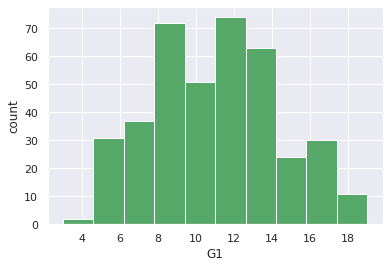

In [ ]:
#histgram、データの指定
ax1 = plt.subplot()
ax1.hist(student_data_math2["G1"],color="g")


#x軸、y軸それぞれのラベル
plt.xlabel("G1")
plt.ylabel("count")

plt.grid(True)

In [ ]:
#各種統計的データ
#平均値
print("平均値:",student_data_math2["G1"].mean())

#中央値
print("中央値:",student_data_math2["G1"].median())

#最頻値
print("最頻値:",student_data_math2["G1"].mode())

#分散
#ddof=0:標準分散　ddof=1:不偏分散（デフォルト）
print("標準分散:",student_data_math2["G1"].var(ddof=0))
print("不偏分散:",student_data_math2["G1"].var(ddof=1))

#標準偏差
print("標準偏差:",student_data_math2["G1"].std())

print()

#要約統計量の一括表示
#分散は標準分散
print(student_data_math2["G1"].describe())
#四分位範囲
print("四分位範囲",student_data_math2["G1"].describe()[6]-student_data_math2["G1"].describe()[4])

平均値: 10.90886075949367
中央値: 11.0
最頻値: 0    10
dtype: int64
標準分散: 10.989161993270308
不偏分散: 11.017053267364904
標準偏差: 3.319194671507669

count    395.000000
mean      10.908861
std        3.319195
min        3.000000
25%        8.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G1, dtype: float64
四分位範囲 5.0


In [ ]:
#全列を対象として、要素統計量を計算
student_data_math2.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


箱ひげ図

{'boxes': [<matplotlib.lines.Line2D at 0x7f357fb2f6d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f357fb33790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f357faba7d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f357faba290>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f357fb2fcd0>,
  <matplotlib.lines.Line2D at 0x7f357fb33250>]}

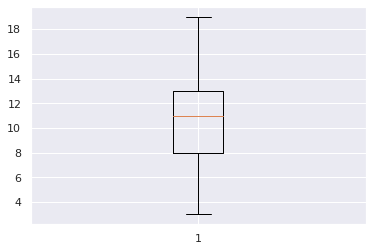

In [ ]:
#　箱ひげ図　G1
plt.boxplot(student_data_math2["G1"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f357faaa0d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f357fab1150>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f357fa3c190>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f357fab1c10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f357faaa690>,
  <matplotlib.lines.Line2D at 0x7f357faaabd0>]}

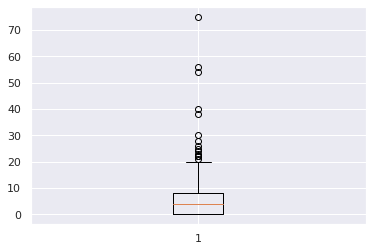

In [ ]:
#　箱ひげ図　absences
plt.boxplot(student_data_math2["absences"])

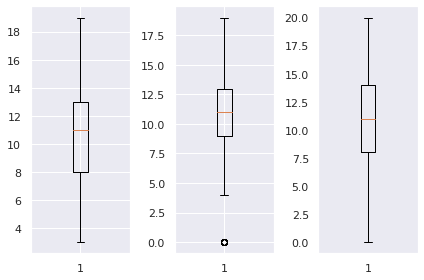

In [ ]:
plt.subplot(1,3,1)
plt.boxplot(student_data_math2["G1"])

plt.subplot(1,3,2)
plt.boxplot(student_data_math2["G2"])

plt.subplot(1,3,3)
plt.boxplot(student_data_math2["G3"])
plt.tight_layout()
plt.grid(False)

変動係数（一覧表示）

In [ ]:
#標準偏差（不偏分散）
student_data_math2.std()
#平均
student_data_math2.mean()

#変動係数
student_data_math2.std()/student_data_math2.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

散布図と相関係数

Text(0, 0.5, 'G1')

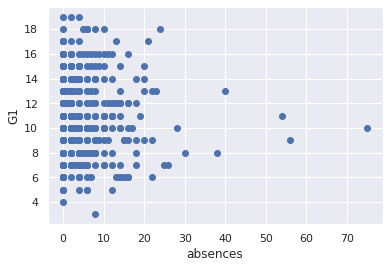

In [ ]:
plt.plot(student_data_math2["absences"],student_data_math2["G1"],"o")
plt.xlabel("absences")
plt.ylabel("G1")

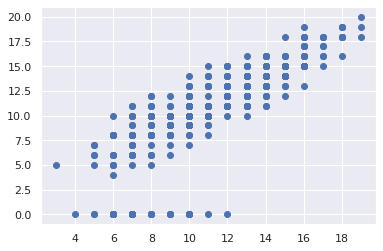

In [ ]:
plt.plot(student_data_math2["G1"],student_data_math2["G3"],"o")

In [ ]:
#G1とG３の共分散
print("G1の分散：",student_data_math2["G1"].var(ddof=0))
print("G3の分散：",student_data_math2["G3"].var(ddof=0))
np.cov(student_data_math2["G1"],student_data_math2["G3"],ddof=0)

G1の分散： 10.989161993270308
G3の分散： 20.936478128505044


array([[10.98916199, 12.15682743],
       [12.15682743, 20.93647813]])

In [ ]:
#相関係数
sp.stats.pearsonr(student_data_math2["G1"],student_data_math2["G3"])

(0.8014679320174141, 9.001430312277354e-90)

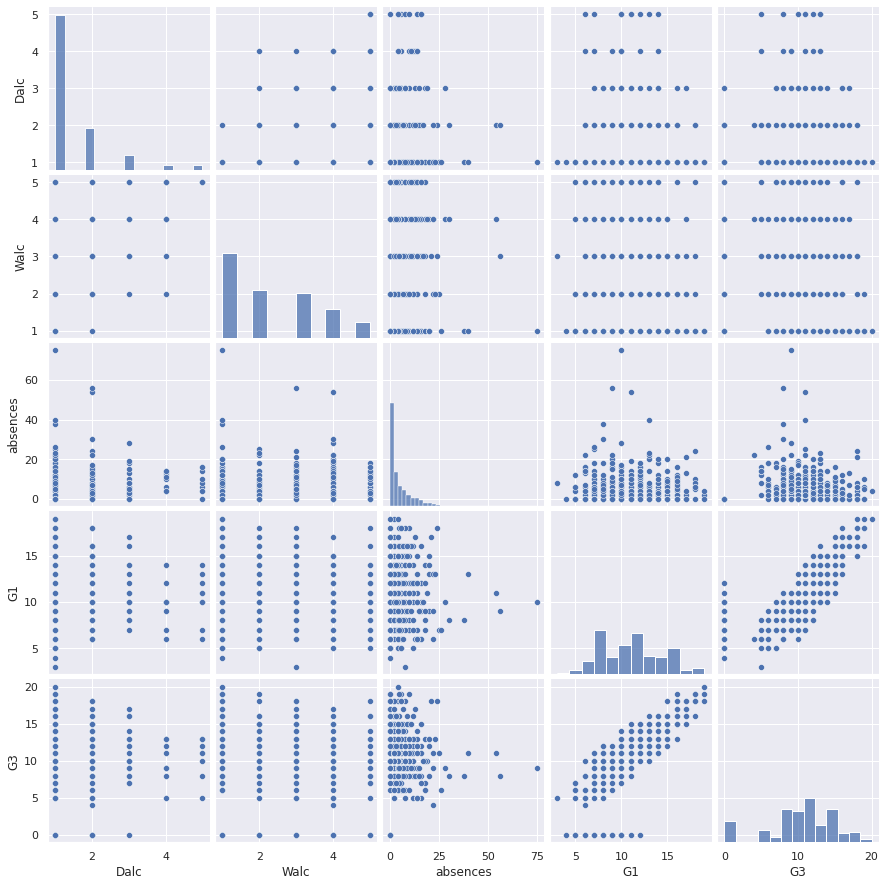

In [ ]:
#複数要素のヒストグラムや散布図を描く
sns.pairplot(student_data_math2[["Dalc","Walc","absences","G1","G3"]])

## **Practice**

In [ ]:
ls

Chapter3  student-mat.csv  student-merge.R  student-por.csv  student.txt


In [ ]:
#ポルトガル語のデータの読み込み
student_data_por = pd.read_csv("student-por.csv",sep=";")
student_data_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
student_data_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [ ]:
student_data_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [ ]:
student_data_math2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
student_data_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
#student_data_math2とstudent_data_porの結合（マージ）
student_data = pd.merge(student_data_math2,
                        student_data_por,
                        on = ["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"],
                        suffixes = ("_math","_por"))
print(student_data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel_por freetime_por  goout_por  Dalc_por  Walc_por health_por  \
0          4            3          4         1         1          3   
1          5            3          3         1         1          3   
2          4            3          2         2         3          3   
3          3            2          2         1         1          5   
4          4            3          2         1         2          5   

  absences_por G1_por G2_por G3_por  
0            4      0     11     11  
1         

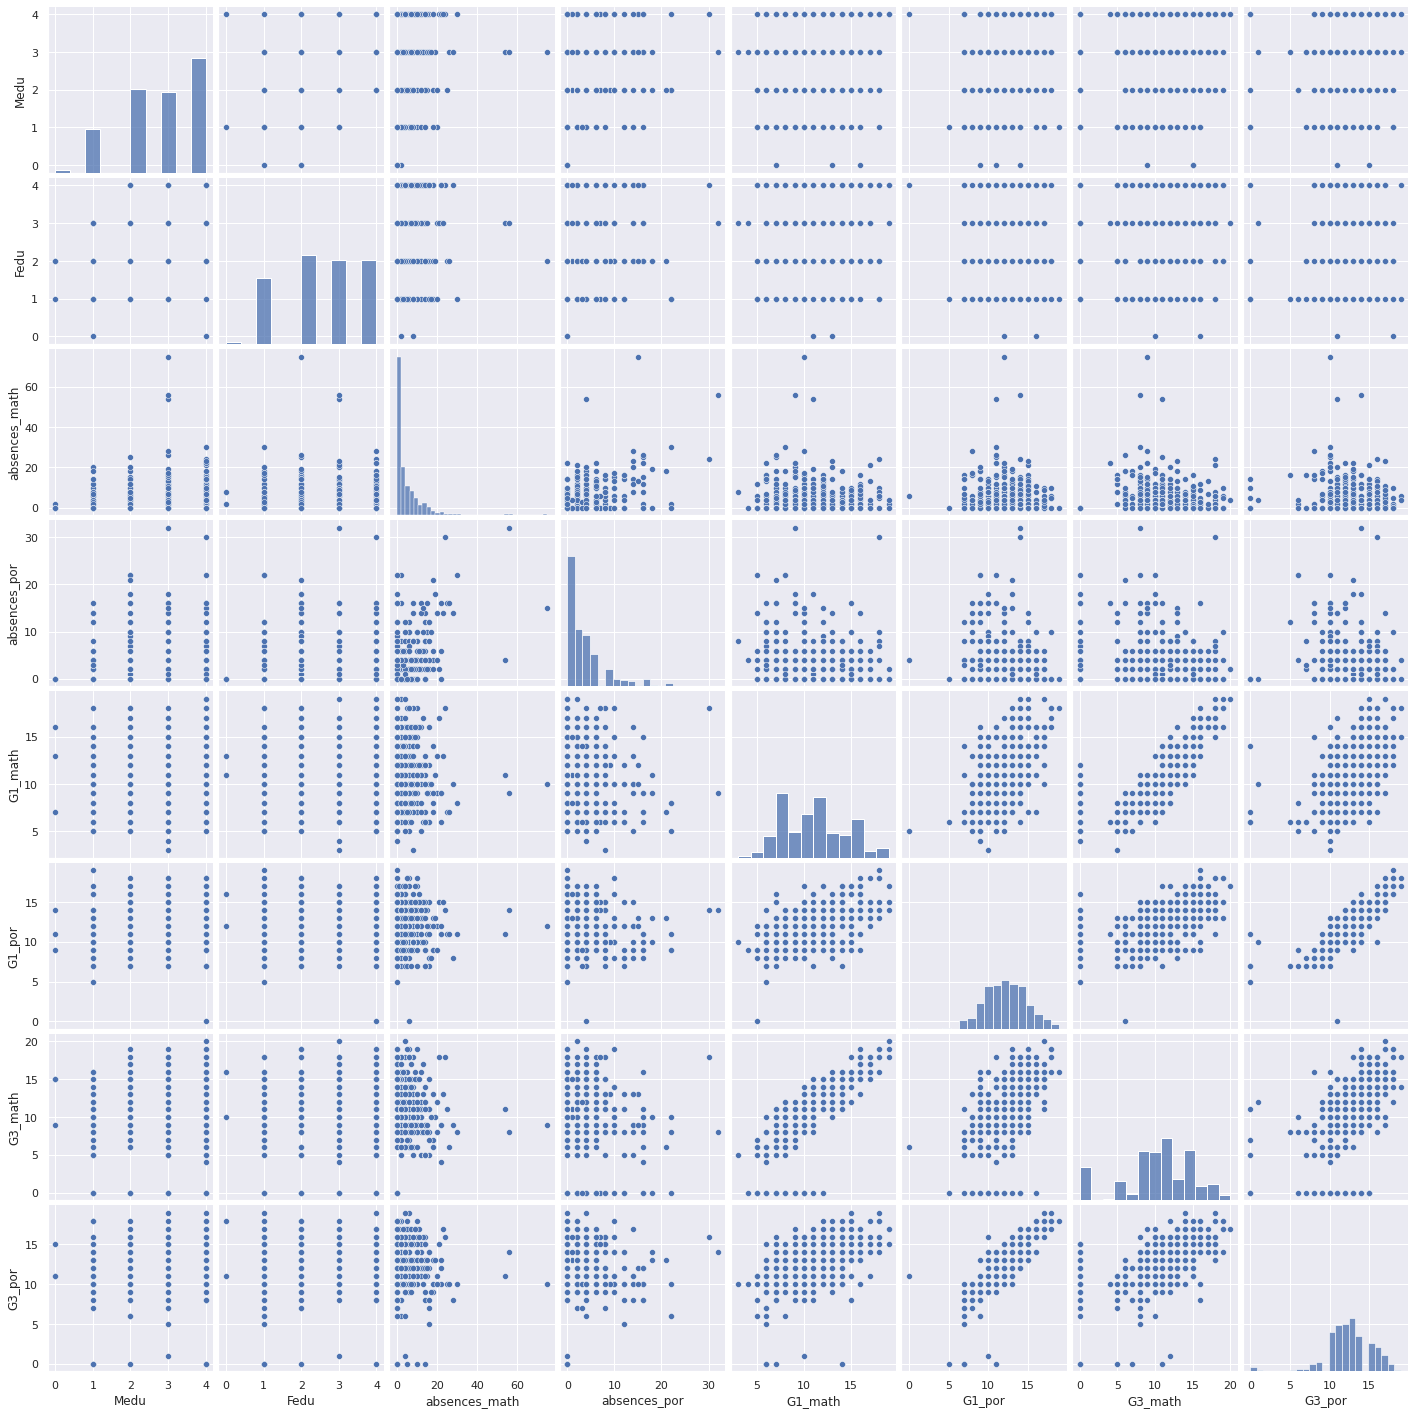

In [ ]:
#マージしたデータを使って、いくつかの変数をピックアップして散布図、ヒストグラムを描く
sns.pairplot(student_data[["Medu","Fedu","absences_math","absences_por","G1_math","G1_por","G3_math","G3_por"]])

### **単回帰分析**

回帰係数： [1.10625609]
切片： -1.6528038288004634
決定係数： 0.6423508460522701


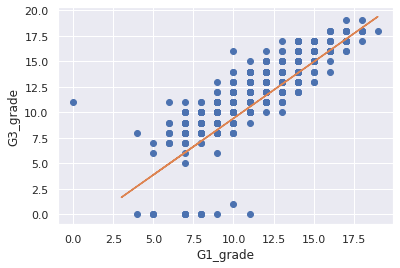

In [ ]:
#G1とG3の単回帰分析
plt.plot(student_data_por["G1"],student_data_por["G3"],"o")

#scilit_learnのインポート
from sklearn import linear_model
#線形回帰のインスタンスを生成
reg = linear_model.LinearRegression()

#説明変数X：G1、目的変数Y：G3とする（※valueに変換していることに注意）
X = student_data_math2.loc[:,["G1"]].values
Y = student_data_math2["G3"].values
#print(X)
#print(Y)

#予測モデルを計算
reg.fit(X,Y)

print("回帰係数：",reg.coef_)
print("切片：",reg.intercept_)

#予測した線形回帰線をグラフに追記
plt.plot(X,reg.predict(X))
plt.xlabel("G1_grade")
plt.ylabel("G3_grade")

#決定係数
print("決定係数：",reg.score(X,Y))

# **practice**

回帰係数： [0.97250087]
切片： 0.8203984121064583
決定係数： 0.6829156800171083


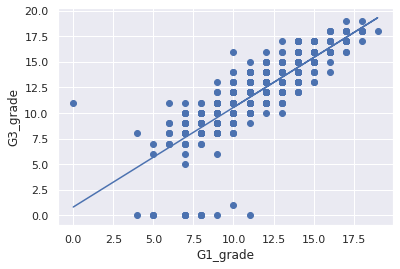

In [ ]:
#ポルトガル語のデータを使って、目的変数Y：G3、説明変数X：G1として単回帰分析を行う
from sklearn import linear_model

regression = linear_model.LinearRegression()
#データの用意
X = student_data_por.loc[:,["G1"]].values
Y = student_data_por["G3"].values

regression.fit(X,Y)

print("回帰係数：",regression.coef_)
print("切片：",regression.intercept_)

plt.scatter(student_data_por["G1"],student_data_por["G3"])
plt.plot(X,regression.predict(X))

plt.xlabel("G1_grade")
plt.ylabel("G3_grade")

print("決定係数：",regression.score(X,Y))



回帰係数： [-0.06361337]
切片： 12.138800862687443
決定係数： 0.008350131955637385


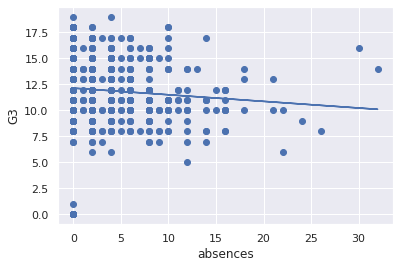

In [ ]:
#説明変数X：absences（欠席数）、目的変数Y：G3　として単回帰分析を行う
from sklearn import linear_model
reg = linear_model.LinearRegression()

X = student_data_por.loc[:,["absences"]].values
Y = student_data_por["G3"].values

reg.fit(X,Y)

print("回帰係数：",reg.coef_)
print("切片：",reg.intercept_)
print("決定係数：",reg.score(X,Y))

plt.scatter(X,Y)
plt.plot(X,reg.predict(X))

plt.xlabel("absences")
plt.ylabel("G3")
plt.grid(True)